## Background

This is a follow up from a webinar hosted by CBOE: "Finding Edge: A Key Part of Trading Process"

The speaker, Euan Sinclair, gives an example of market displacement between VXN vs NDX. I found this webinar very insightful and it gave me a peak inside to the thought process behind generating ideas and following them up with trades.

I would like to explore this idea furter with other indices.

In [1]:
import sys
import os
import datetime

import pandas as pd
import numpy as np

import yfinance as yf
from fredapi import Fred

import matplotlib.pyplot as plt



In [2]:
sys.path.append('/Users/lukelee/Documents/Interview/Learning/')

In [3]:
# custom modules that are present in this Git repo, written by me
import yahoo.code.support_functions as sf
import yahoo.code.plot_functions as pf
# I've refactored the initial version of this notebook into a custom module below
import yahoo.code.dislocation_analysis as da


## Part 1: Replication of VXN/VIX

In [4]:
vix_hist = da.extract_hist_yf("^VIX")
# 30 day implied volatility of SPX Options

Long_Name='CBOE Volatility Index'
Symbol='^VIX'
                                Open       High    Low      Close
Date                                                             
2025-06-10 00:00:00-05:00  17.500000  17.990000  16.68  16.950001
2025-06-11 00:00:00-05:00  17.040001  18.090000  16.23  17.260000
2025-06-12 00:00:00-05:00  17.870001  18.870001  17.43  18.020000


Time Series data from 1990-01-02 to 2025-06-12. Total of 8928 observation


In [5]:
vxn_hist = da.extract_hist_yf("^VXN")
# Cboe NASDAQ-100 Volatility Index

Error in getting ticker information 
 HTTP Error 401: 
                                Open       High        Low      Close
Date                                                                 
2025-06-10 00:00:00-04:00  20.049999  20.559999  19.610001  19.820000
2025-06-11 00:00:00-04:00  19.320000  20.940001  19.219999  20.379999
2025-06-12 00:00:00-04:00  20.860001  21.170000  20.370001  20.690001


Time Series data from 2001-01-23 to 2025-06-12. Total of 6133 observation


### Notes on columns used in the analysis

Here are the definitions of columns that are reference in the main_analysis function


| Column Name | Description |
| -------------|-------------| 
| Ratio     |  Ratio of 2 time series (e.g. VXN/VIX)| 
| Rolling30     | Take a rolling 30 average of the Ratio      | 
| Diff | Take the difference between Ratio - Rolling30     |

        

Performing analysis of VXN over VIX, Ratio = VXN/VIX
Summary Statistics
         Ratio  Rolling30      Diff
min   0.755972   1.081028 -0.414833
mean  1.193898   1.201626 -0.007728
max   1.412983   1.342119  0.137199
std   0.096200   0.067787  0.076727
The 0.5% quantile of the difference is -0.305
The 99.5% quantile of the difference is 0.216


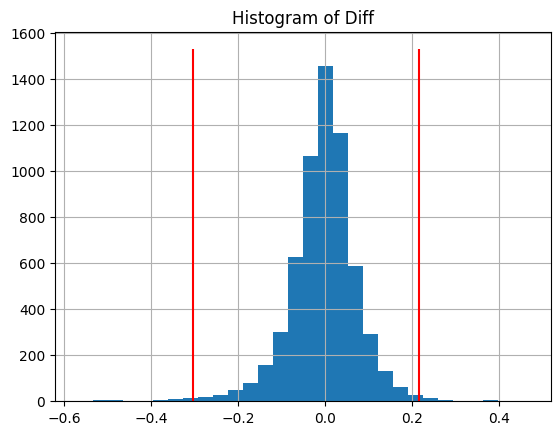

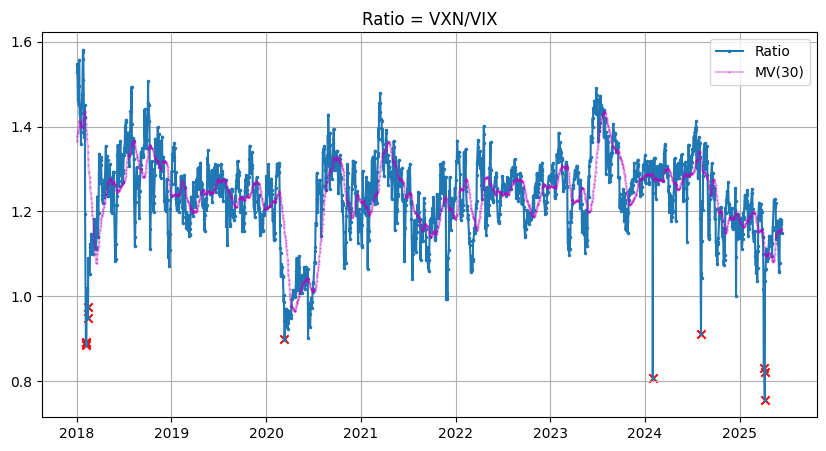

In [6]:
identified_df, ratio_df = da.main_analysis(analysis_dictionary={'VXN':vxn_hist,'VIX':vix_hist}, 
                                    query = "(Diff < -0.25) and (Ratio < 1)")

## Part 2: New ideas

Now that we have re-visited the topic discussed during the webinar, lets expand the analysis to other volatility indexes

### Example 1: DJIA Volatility Index(VXD) vs VIX

The ratio is very stationary and usually hovers around 1.0, more recently it has been hovering 0.9

There are, rather large, dislocation where the ratio spikes up around 2024 and one large down ward spike in 2021.

In [7]:
# CBOE DJIA Volatility Index (VXDCLS)
VXD_data = da.extract_hist_fred("VXDCLS")

Long_Name='CBOE DJIA Volatility Index'
Symbol='VXDCLS'
            Close
2025-06-09  15.96
2025-06-10  15.82
2025-06-11  16.21


Time Series data from 1997-10-07 to 2025-06-11. Total of 7223 observation


In [8]:
VXD_data.tail()

,Close
2025-06-05,17.05
2025-06-06,15.53
2025-06-09,15.96
2025-06-10,15.82
2025-06-11,16.21


Performing analysis of VXD over VIX, Ratio = VXD/VIX
Summary Statistics
         Ratio  Rolling30      Diff
min   0.635579   0.846234 -0.291621
mean  0.900662   0.899228  0.001433
max   1.637249   0.970607  0.716337
std   0.080074   0.035660  0.077683
The 0.5% quantile of the difference is -0.157
The 99.5% quantile of the difference is 0.145


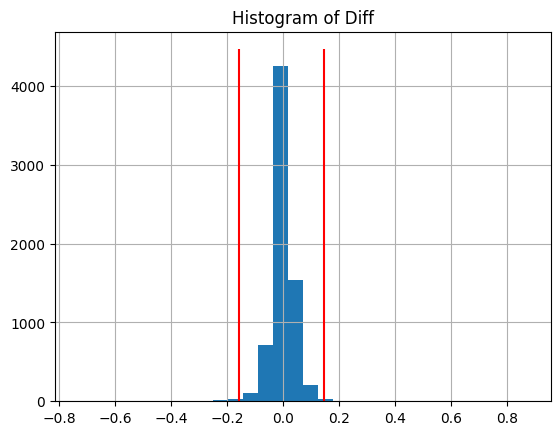

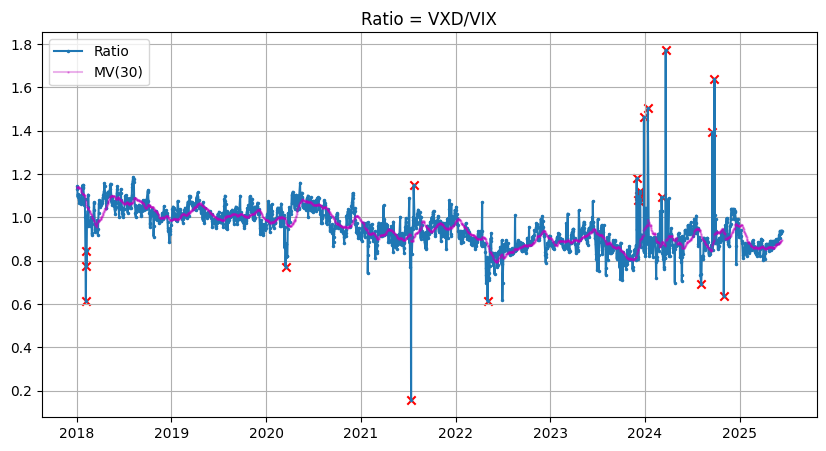

In [9]:
identified_df1, ratio_df1 = da.main_analysis(analysis_dictionary={'VXD':VXD_data,'VIX':vix_hist},
                                            query = "Diff < -0.2 or Diff > 0.2")


### Example 2: Crude Oil Volatility Index(OVX) vs VIX

The ratio has a cyclical nature, which is expected for commodities such as Oil, and overall the ratio hovers around 2.

This relationship is very different from the other ones we've explored today

- Oil is much more volatile
- There is a cyclical pattern
- Extreme dislocation around late April 2020

It is plausible for someone to consider trading not only the large dislocation (as seen in late April 2020) but also the cyclical patterns of the ratio. However, this would pose a different set of problem; longer time horizon. If one was to consider entering a trade either at the peak or trough of the ratio, they would need to wait in the order on months and not days. This might pose problems such as margin during the holding period and possibly running into exceptionally long holding period. What I mean by exceptionally long holding period is that if you entered a trad in the early 2020, the time to reach the peak would be longer than what the historical data would have told you. Similar period can be observed around late 2023 and early 2024.

In [10]:
# CBOE Crude Oil Volatility Index, ^OVX
ovx_hist = da.extract_hist_yf("^OVX")


Error in getting ticker information 
 HTTP Error 401: 
                                Open       High        Low      Close
Date                                                                 
2025-06-10 00:00:00-04:00  34.180000  36.000000  32.709999  35.049999
2025-06-11 00:00:00-04:00  34.779999  43.880001  34.680000  43.240002
2025-06-12 00:00:00-04:00  44.459999  46.430000  42.580002  45.369999


Time Series data from 2007-05-10 to 2025-06-12. Total of 4552 observation


Performing analysis of OVX over VIX, Ratio = OVX/VIX
Summary Statistics
         Ratio  Rolling30      Diff
min   0.986979   1.382158 -1.179634
mean  1.952710   1.957499 -0.004789
max   2.799342   2.417679  0.737554
std   0.368329   0.280690  0.292779
The 0.5% quantile of the difference is -0.999
The 99.5% quantile of the difference is 1.089


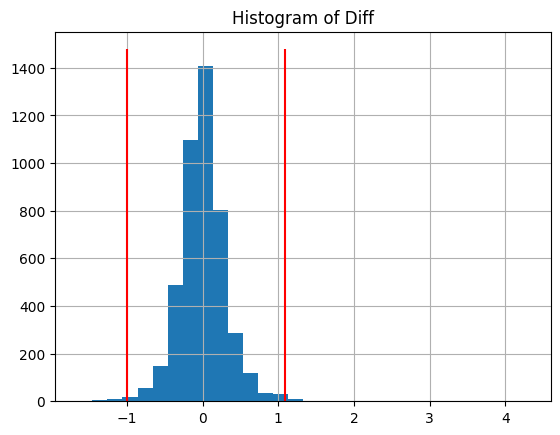

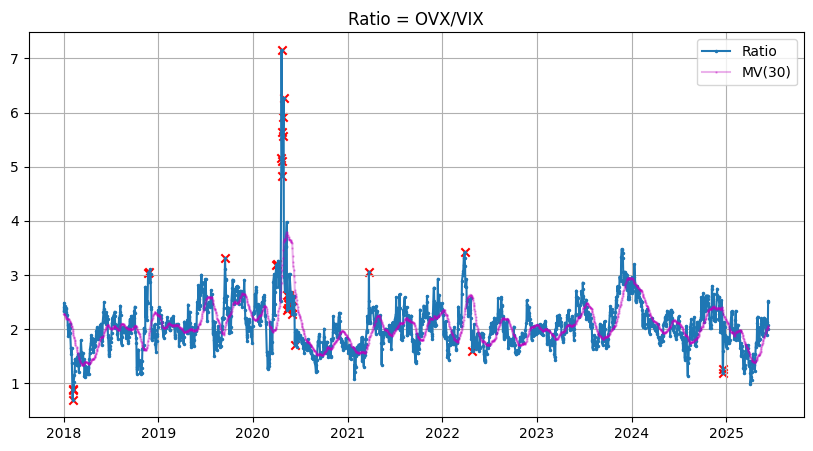

In [11]:
identified_df2, ratio_df2 = da.main_analysis(analysis_dictionary={'OVX':ovx_hist,'VIX':vix_hist},
                                            query = "(Diff > 1.1 and Ratio >3) or Diff < -0.99")


### Example 3: Russell 2000 Volatility Index(RVX) vs VIX

The ratio seems to be non-stationary and tends to drift. Before 2022 it seems to have an upward drift, followed by a period of short lived stationary period around 2022, and then a steady decline since 2024.

I'd say, out of all the relationships we've reviewed in this notebook, this would be the hardest one to take advantage of the dislocation.

In [12]:
# CBOE Russell 2000 Volatility Index (RVXCLS)
RVX_data = da.extract_hist_fred("RVXCLS")

Long_Name='CBOE Russell 2000 Volatility Index'
Symbol='RVXCLS'
            Close
2025-06-09  22.92
2025-06-10  22.65
2025-06-11  22.47


Time Series data from 2004-01-02 to 2025-06-11. Total of 5594 observation


In [13]:
RVX_data.tail()

,Close
2025-06-05,24.08
2025-06-06,22.30
2025-06-09,22.92
2025-06-10,22.65
2025-06-11,22.47


Performing analysis of RVX over VIX, Ratio = RVX/VIX
Summary Statistics
         Ratio  Rolling30      Diff
min   0.864131   1.100678 -0.420615
mean  1.343859   1.357247 -0.013387
max   1.818044   1.551441  0.272308
std   0.163546   0.136916  0.108609
The 0.5% quantile of the difference is -0.249
The 99.5% quantile of the difference is 0.205


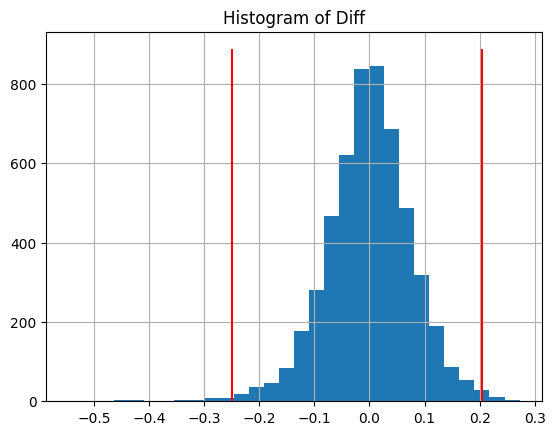

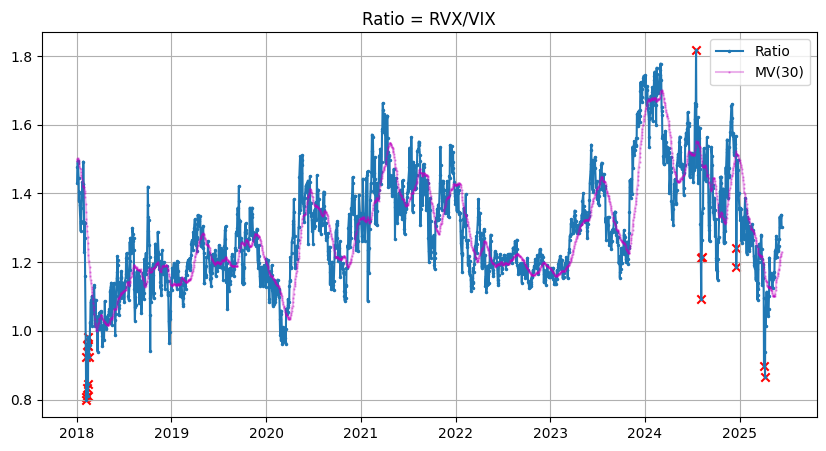

In [14]:
identified_df3, ratio_df3 = da.main_analysis(analysis_dictionary={'RVX':RVX_data,'VIX':vix_hist}, 
                                    query = "Diff < -0.25 or (Diff > 0.22 and Ratio > 1.6)")

### Example 4: Crude Oil Volatility Index(OVX) vs Gold Volatility Index(GVZ)

This ratio is very similar to the Example 2 OVX vs VIX

In [16]:
# CBOE Gold Volatility Index, ^GVZ
gvz_hist = da.extract_hist_yf("^GVZ")



Error in getting ticker information 
 HTTP Error 401: 
                                Open       High        Low      Close
Date                                                                 
2025-06-10 00:00:00-04:00  19.299999  19.360001  18.940001  19.000000
2025-06-11 00:00:00-04:00  18.600000  19.240000  18.299999  19.160000
2025-06-12 00:00:00-04:00  20.100000  20.350000  19.379999  19.700001


Time Series data from 2008-06-03 to 2025-06-12. Total of 4284 observation


Performing analysis of OVX over GVZ, Ratio = OVX/GVZ
Summary Statistics
         Ratio  Rolling30      Diff
min   1.423324   1.604815 -0.752469
mean  2.000873   1.989702  0.011171
max   3.050376   2.589298  0.878501
std   0.318676   0.238132  0.248753
The 0.5% quantile of the difference is -1.059
The 99.5% quantile of the difference is 1.533


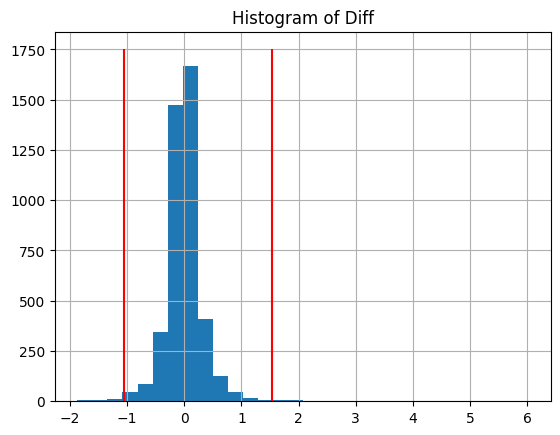

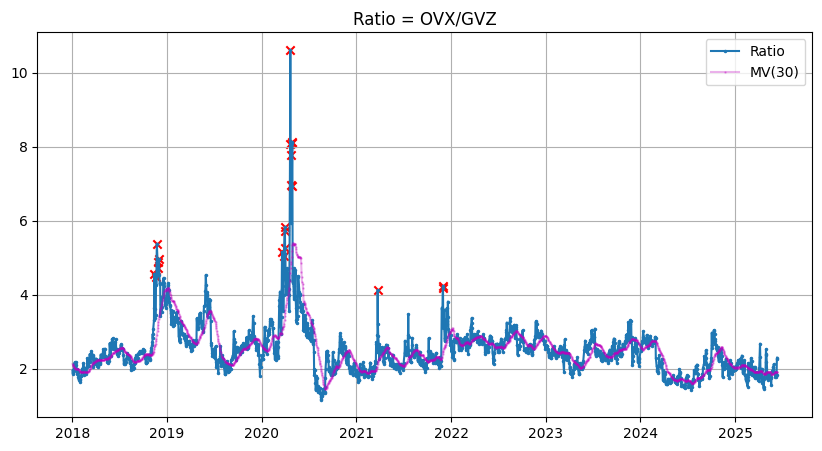

In [17]:
identified_df4, ratio_df4 = da.main_analysis(analysis_dictionary={'OVX':ovx_hist,'GVZ':gvz_hist},
                                            query = "Diff > 1.5")

### Example 5: VIX vs Gold Volatility Index(GVZ)

Unlike the other relationships we've explored, the Gold volatility is less than the VIX. So I've decided to flip the ratio so that the ratio is VIX / GVZ.



Performing analysis of VIX over GVZ, Ratio = VIX/GVZ
Summary Statistics
         Ratio  Rolling30      Diff
min   0.736685   0.784193 -0.417831
mean  1.053033   1.046008  0.007025
max   2.387195   1.412249  1.027379
std   0.231125   0.148539  0.209163
The 0.5% quantile of the difference is -0.465
The 99.5% quantile of the difference is 0.603


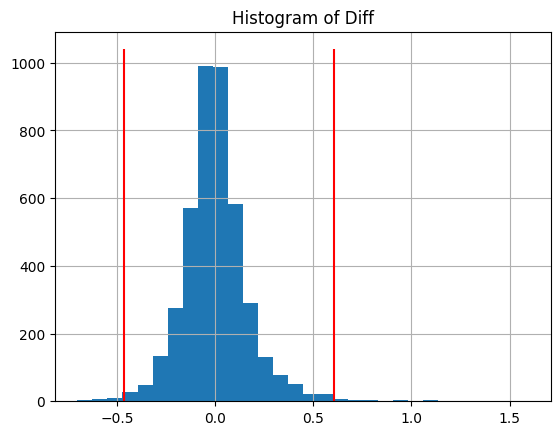

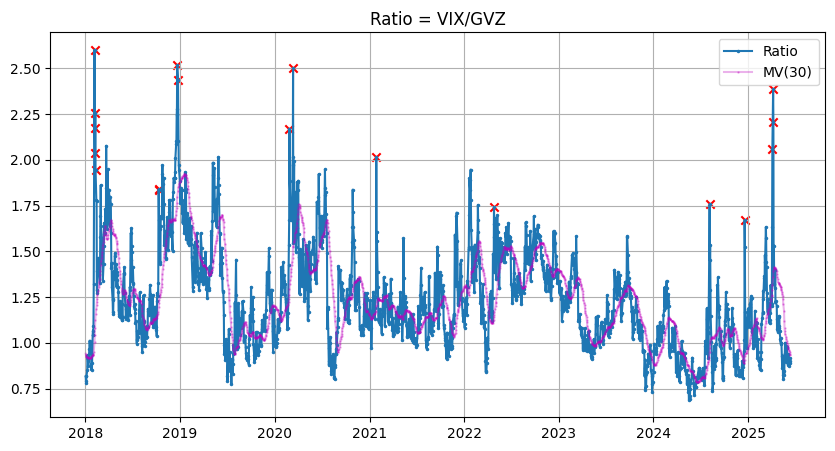

In [18]:
identified_df5, ratio_df5 = da.main_analysis(analysis_dictionary={'VIX':vix_hist,'GVZ':gvz_hist},
                                            query = "Diff > 0.6")


## Appendix


In [19]:
# CBOE NASDAQ 100 Volatility Index (VXNCLS) -> we already have this via Yahoo finance's ticker VXN
# VXN_data = da.extract_hist_fred("VXNCLS")

In [20]:
volndx_hist = da.extract_hist_yf("^VOLNDX",period='5d')
# no data available!, seems like only today's data is fetched

Error in getting ticker information 
 HTTP Error 401: 
                                   Open          High           Low  \
Date                                                                  
2025-06-12 00:00:00-04:00  10016.099609  10063.836914  10008.543945   

                                  Close  
Date                                     
2025-06-12 00:00:00-04:00  10049.086914  


Time Series data from 2025-06-12 to 2025-06-12. Total of 1 observation


In [21]:
volq_hist = da.extract_hist_yf("^VOLQ")
# very limited history in 2023 only

Error in getting ticker information 
 HTTP Error 401: 
                                Open       High        Low      Close
Date                                                                 
2023-09-27 00:00:00-04:00  20.870001  22.219999  20.790001  21.080000
2023-09-28 00:00:00-04:00  21.809999  22.059999  19.930000  20.320000
2023-09-29 00:00:00-04:00  19.450001  20.510000  18.780001  20.209999


Time Series data from 2023-06-26 to 2023-09-29. Total of 68 observation
